# Face Transformer Analysis

In [1]:
import numpy as np
import pandas as pd
import respiration.utils as utils

evaluation_dir = utils.dir_path('outputs', 'signals')

predictions_file = utils.join_paths(evaluation_dir, 'transformer_predictions.csv')
predictions = pd.read_csv(predictions_file)
predictions['signal'] = predictions['signal'].apply(eval).apply(np.array)
predictions.head()

,subject,setting,model,signal
0,Proband21,303_normalized_face,20240710_142159,"[-0.023982403799891472, -0.023851005360484123,..."
1,Proband22,303_normalized_face,20240710_142159,"[-0.023859316483139992, -0.021364865824580193,..."
2,Proband23,303_normalized_face,20240710_142159,"[0.029018523171544075, 0.02900373749434948, 0...."
3,Proband24,303_normalized_face,20240710_142159,"[0.010098813101649284, 0.009706074371933937, 0..."
4,Proband25,303_normalized_face,20240710_142159,"[-0.01839650236070156, -0.013670293614268303, ..."


## Compare the predictions to the ground truth

In [2]:
from respiration.dataset import VitalCamSet

sample_rate = 30
dataset = VitalCamSet()

In [3]:
import respiration.analysis as analysis

models = predictions['model'].unique()

experiment_analysis = analysis.Analysis()

predictions_all = {}
ground_truths_all = {}

for model in models:
    signals = predictions[predictions['model'] == model]

    predictions_all[model] = np.array([])
    ground_truths_all[model] = np.array([])

    for idx, row in signals.iterrows():
        subject, setting = row['subject'], row['setting']
        prediction = row['signal']
        gt_signal = dataset.get_breathing_signal(subject, setting)
        experiment_analysis.add_data(model, prediction, gt_signal, sample_rate)

        predictions_all[model] = np.concatenate([predictions_all[model], prediction])
        ground_truths_all[model] = np.concatenate([ground_truths_all[model], gt_signal])

In [4]:
results_table = pd.DataFrame(experiment_analysis.metric_table())
results_table

,model,method,MSE,MAE,RMSE,MAPE,PCC,SCC
0,20240710_142159,cp,0.009457,0.075278,0.097249,26.177738,-0.448237,-0.412693
1,20240710_142159,nfcp,0.015258,0.101790,0.123524,34.164508,-0.352343,-0.290838
2,20240710_142159,pk,0.009053,0.071975,0.095150,25.581292,-0.336445,-0.330207
3,20240710_142159,psd,0.032274,0.153642,0.179649,51.561989,-0.182362,-0.189721
4,20240710_194632,cp,0.014778,0.099815,0.121564,34.210725,-0.103956,-0.020877
5,20240710_194632,nfcp,0.021346,0.126667,0.146102,41.994917,-0.417615,-0.288178
6,20240710_194632,pk,0.010776,0.087963,0.103806,30.380789,0.165137,0.151683
7,20240710_194632,psd,0.019679,0.111481,0.140282,38.677173,0.324654,0.380016
8,20240710_220756,cp,0.011005,0.085648,0.104903,29.454713,-0.053903,-0.089138
9,20240710_220756,nfcp,0.018433,0.109599,0.135767,37.001987,-0.532742,-0.504930


In [5]:
model_ranks = experiment_analysis.rank_models()
model_ranks

,model,method,metric,value,rank
0,20240710_142159,cp,MSE,0.009457,2
1,20240710_142159,cp,MAE,0.075278,2
2,20240710_142159,cp,RMSE,0.097249,2
3,20240710_142159,cp,MAPE,26.177738,2
4,20240710_142159,cp,PCC,0.551763,1
...,...,...,...,...,...
163,20240713_090928,psd,MAE,0.137160,4
164,20240713_090928,psd,RMSE,0.163916,4
165,20240713_090928,psd,MAPE,44.154101,5
166,20240713_090928,psd,PCC,0.843495,6


In [6]:
mean_rank = experiment_analysis.get_mean_model_ranks()
mean_rank

,mean_rank,std_rank
model,,
20240710_142159,3.083333,1.954185
20240713_090928,3.083333,2.205067
20240712_163619,3.458333,1.614585
20240710_220756,4.500000,1.414214
20240711_194917,4.500000,1.865010
20240712_113946,4.583333,1.612901
20240710_194632,4.791667,2.501811


## Show some predictions

In [7]:
from respiration.dataset import VitalCamSet

dataset = VitalCamSet()

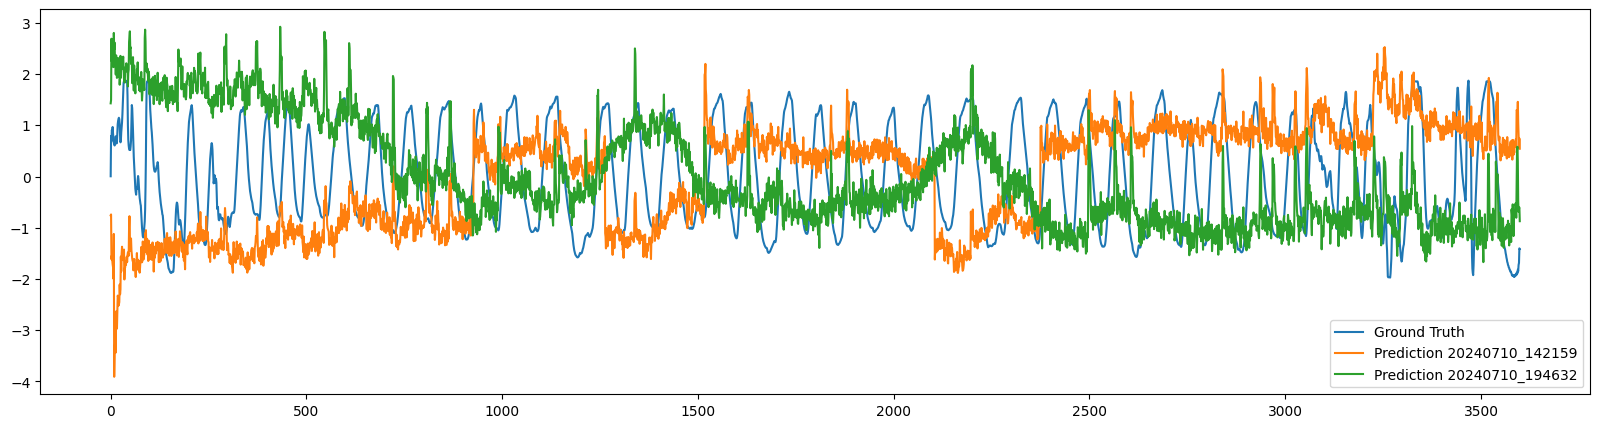

In [8]:
import matplotlib.pyplot as plt

subject = 'Proband21'
setting = '303_normalized_face'

gt_signal = dataset.get_breathing_signal(subject, setting)
# gt_signal = analysis.butterworth_filter(gt_signal, 30, 0.08, 0.5)
gt_signal = analysis.normalize_signal(gt_signal)

prediction_1 = predictions[
    (predictions['model'] == '20240710_142159') &
    (predictions['subject'] == subject) &
    (predictions['setting'] == setting)]['signal'].values[0]
# prediction_1 = analysis.butterworth_filter(prediction_1, 30, 0.08, 0.5)
prediction_1 = analysis.normalize_signal(prediction_1)
prediction_2 = predictions[
    (predictions['model'] == '20240710_194632') &
    (predictions['subject'] == subject) &
    (predictions['setting'] == setting)]['signal'].values[0]
# prediction_2 = analysis.butterworth_filter(prediction_2, 30, 0.08, 0.5)
prediction_2 = analysis.normalize_signal(prediction_2)

plt.figure(figsize=(20, 5))
plt.plot(gt_signal, label='Ground Truth')
plt.plot(prediction_1, label='Prediction 20240710_142159')
plt.plot(prediction_2, label='Prediction 20240710_194632')
plt.legend()
plt.show()

In [9]:
model_correlations = []

for model in models:
    for other_model in models:
        # correlation = analysis.pearson_correlation(predictions_all[model], predictions_all[other_model])
        correlation = analysis.spearman_correlation(predictions_all[model], predictions_all[other_model])
        model_correlations.append({
            'model': model,
            'other_model': other_model,
            'correlation': abs(correlation)
        })

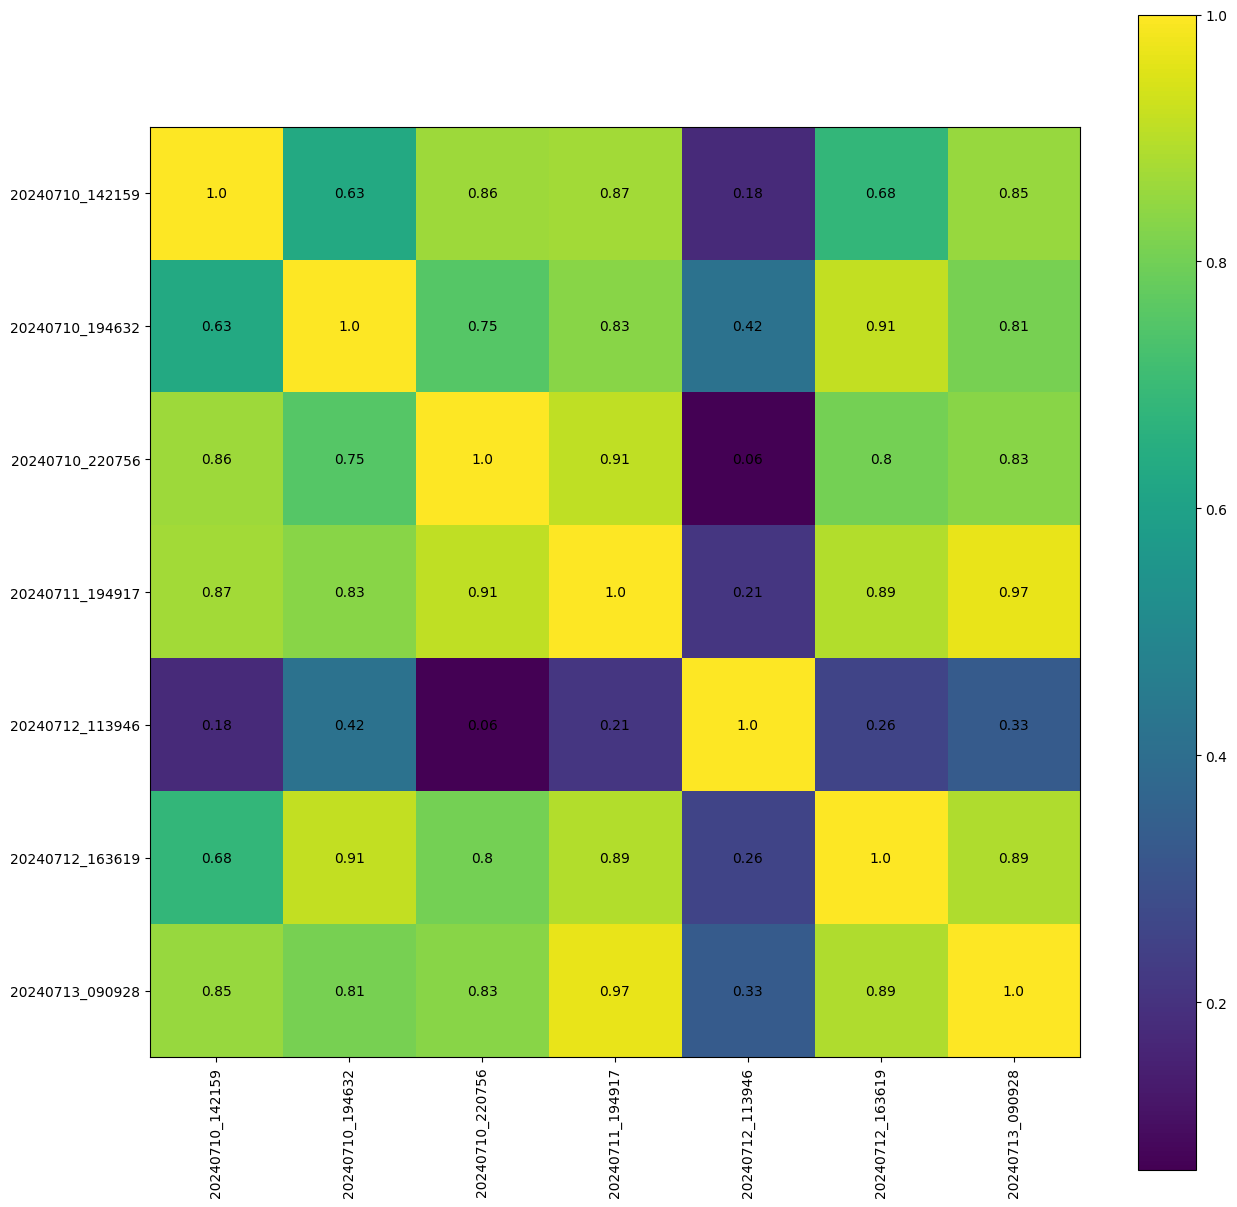

In [10]:
# Convert list of dictionaries to DataFrame
model_correlations_df = pd.DataFrame(model_correlations)

# Pivot the DataFrame
correlations_pivoted = model_correlations_df.pivot(index='model', columns='other_model', values='correlation')

# Plot the correlation matrix
plt.figure(figsize=(15, 15))
plt.imshow(correlations_pivoted, cmap='viridis', interpolation='nearest')

# Show the correlation values in the plot
for idx in range(len(models)):
    for idy in range(len(models)):
        plt.text(idy, idx, round(correlations_pivoted.iloc[idx, idy], 2), ha='center', va='center', color='black')

plt.colorbar()
plt.xticks(range(len(models)), models, rotation=90)
plt.yticks(range(len(models)), models)
plt.show()